In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurant-data/zomato.csv


In [2]:
zomato=pd.read_csv('/kaggle/input/restaurant-data/zomato.csv')
zomato.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [3]:
zomato.shape

(51717, 17)

In [4]:
zomato.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [5]:
# Null values in each column
zomato.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
# % null values in each column
(zomato.isna().sum()/len(zomato))*100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [7]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [8]:
zomato=zomato.dropna(axis='index',subset=['rate'])
zomato

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7 /5,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [9]:
# remove '/5' from each value of 'rate' column
def split(x):
    return x.split('/')[0]

In [10]:
zomato['rate']=zomato['rate'].apply(split)

In [11]:
zomato['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [12]:
# Remove values other than numbers
zomato=zomato.replace({'NEW','-'},0)

In [13]:
zomato['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [14]:
# change 'rate' column to float datatype
zomato['rate']=zomato['rate'].astype(float)

In [15]:
zomato['rate'].dtypes

dtype('float64')

# Calculate avg. rating of each restaurant

In [16]:
df_rate=zomato.groupby('name')['rate'].mean().to_frame().reset_index()
df_rate.columns=['restaurant','avg_rating']
df_rate

,restaurant,avg_rating
0,#FeelTheROLL,3.400000
1,#L-81 Cafe,3.900000
2,#refuel,3.700000
3,1000 B.C,3.200000
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
...,...,...
7157,i-Bar - The Park Bangalore,3.800000
7158,iFruit Live Ice Creams,3.400000
7159,iSpice Resto Cafe,3.700000
7160,nu.tree,4.314286


# Distribution of rating column

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_rating', ylabel='Density'>

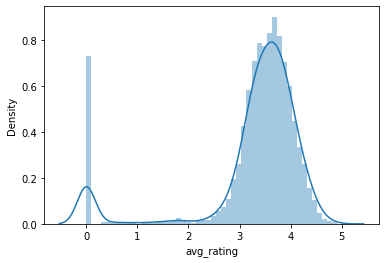

In [17]:
sns.distplot(df_rate['avg_rating'])

# Top restaurant chains in Bangalore

Text(0.5, 0, 'no. of Outlets')

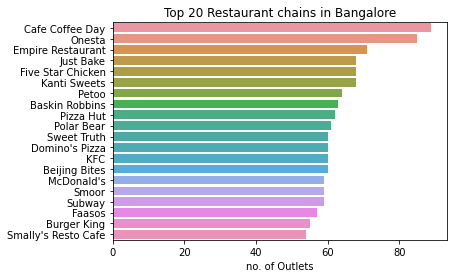

In [18]:
chains=zomato['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index)
plt.title('Top 20 Restaurant chains in Bangalore')
plt.xlabel('no. of Outlets')

# Restaurant that do not accept online order

In [19]:
zomato.loc[zomato['online_order']=='No',['name']]

,name
3,Addhuri Udupi Bhojana
4,Grand Village
6,Rosewood International Hotel - Bar & Restaurant
13,Caf-Eleven
18,T3H Cafe
...,...
51709,The Farm House Bar n Grill
51711,Bhagini
51712,Best Brews - Four Points by Sheraton Bengaluru...
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...


In [20]:
x=zomato['online_order'].value_counts()
x

Yes    28308
No     15634
Name: online_order, dtype: int64

In [21]:
import plotly.express as px

In [22]:
px.pie(zomato,values=x,labels=['accepted','not accepted'],title='Pie Chart')

# Ratio between reataurants that book table and those that do not

In [23]:
xx=zomato['book_table'].value_counts()
xx

No     37509
Yes     6433
Name: book_table, dtype: int64

In [24]:
px.pie(zomato,values=xx,labels=['Book table','Do not book table'],title='Pie Chart')

In [25]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [26]:
trace=go.Pie(labels=['Book table','Do not book table'],values=xx,hoverinfo='label+percent',textinfo='value')
iplot([trace])

# Type of Restaurant

In [27]:
zomato['rest_type'].isna().sum()

151

In [28]:
zomato=zomato.dropna(subset=['rest_type'])

In [29]:
zomato['rest_type'].isna().sum()

0

In [30]:
zz=zomato['rest_type'].value_counts()
zz

Quick Bites                   15073
Casual Dining                  9923
Cafe                           3527
Dessert Parlor                 1939
Delivery                       1791
                              ...  
Bakery, Food Court                2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Quick Bites, Kiosk                1
Name: rest_type, Length: 87, dtype: int64

In [31]:
trace1=go.Bar(x=zomato['rest_type'].value_counts().nlargest(20).index,
             y=zomato['rest_type'].value_counts().nlargest(20))
iplot([trace1])

# Highest voted restaurants

In [32]:
trace2=go.Bar(x=zomato.groupby('name')['votes'].sum().nlargest(20).index,
             y=zomato.groupby('name')['votes'].sum().nlargest(20))
iplot([trace2])

# Total restaurants at different locations of Bangalore

In [33]:
location=[]
restaurant=[]
for loc,res in zomato.groupby('location'):
    location.append(loc)
    restaurant.append(len(res['name'].unique()))

In [34]:
res_loc=pd.DataFrame(zip(location,restaurant))
res_loc.columns=['location','no. of restaurants']
res_loc

,location,no. of restaurants
0,BTM,578
1,Banashankari,238
2,Banaswadi,150
3,Bannerghatta Road,361
4,Basavanagudi,195
...,...,...
87,West Bangalore,3
88,Whitefield,633
89,Wilson Garden,40
90,Yelahanka,3


In [35]:
res_loc.set_index('location',inplace=True)
res_loc

,no. of restaurants
location,
BTM,578
Banashankari,238
Banaswadi,150
Bannerghatta Road,361
Basavanagudi,195
...,...
West Bangalore,3
Whitefield,633
Wilson Garden,40


<AxesSubplot:xlabel='location'>

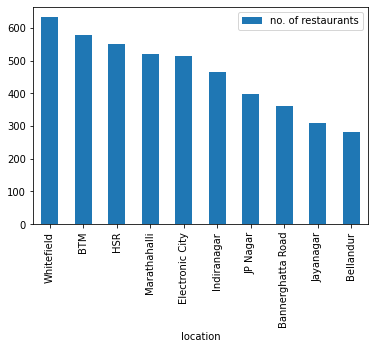

In [36]:
res_loc.sort_values(by='no. of restaurants',ascending=False).head(10).plot.bar()

# Total no. of variety of restaurants in Bangalore

In [37]:
cuisines=zomato['cuisines'].value_counts()[:10]
cuisines

North Indian                           2284
North Indian, Chinese                  2036
South Indian                           1320
Cafe                                    653
Bakery, Desserts                        644
Biryani                                 632
South Indian, North Indian, Chinese     601
Fast Food                               580
Desserts                                572
Chinese                                 449
Name: cuisines, dtype: int64

In [38]:
trace3=go.Bar(x=cuisines.index,y=cuisines)
iplot([trace3])

# Analyse 'approx cost for two people'

In [39]:
zomato['approx_cost(for two people)'].isna().sum()

250

In [40]:
zomato.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True)

In [41]:
zomato['approx_cost(for two people)'].isna().sum()

0

In [42]:
zomato['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [43]:
zomato['approx_cost(for two people)']=zomato['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [44]:
zomato['approx_cost(for two people)']=zomato['approx_cost(for two people)'].astype(int)

In [45]:
zomato['approx_cost(for two people)'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130, 1700, 1400, 1350, 2200,
       2000, 1800, 1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,
         40, 1250, 3500, 4000, 2400, 2600, 1450,   70, 3200,  560,  240,
        360, 6000, 1050, 2300, 4100,  120, 5000, 3700, 1650, 2700, 4500])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



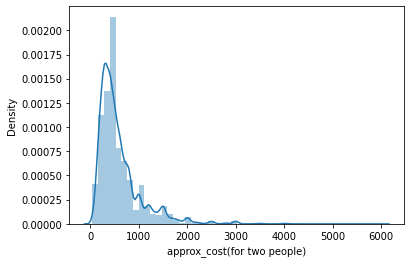

In [46]:
sns.distplot(zomato['approx_cost(for two people)']);

# Correlation between 'approx_cost(for two people)' and 'rate' of restaurants

<AxesSubplot:xlabel='rate', ylabel='approx_cost(for two people)'>

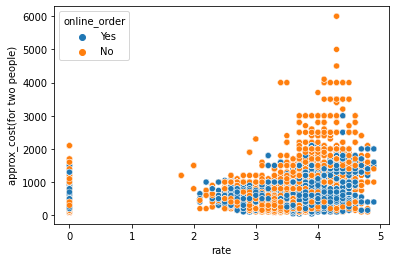

In [47]:
sns.scatterplot(data=zomato,x='rate',y='approx_cost(for two people)',hue='online_order')

# Difference between votes of restaurents accepting and not accepting online orders

<AxesSubplot:xlabel='online_order', ylabel='votes'>

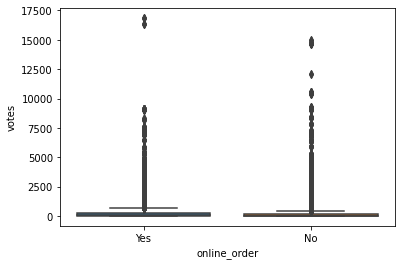

In [48]:
sns.boxplot(data=zomato,x='online_order',y='votes')

In [49]:
px.box(zomato,x='online_order',y='votes')

# Difference between prices of restaurents accepting and not accepting online orders

In [50]:
px.box(zomato,x='online_order',y='approx_cost(for two people)')

# Most luxurious restaurant in Bangalore

In [51]:
zomato['approx_cost(for two people)'].max()

6000

In [52]:
zomato.loc[zomato['approx_cost(for two people)']==6000,'name']

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

# Top 10 most expensive restaurants

In [53]:
zomato_copy=zomato.sort_values('approx_cost(for two people)',ascending=False)
zomato_copy

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
45618,https://www.zomato.com/bangalore/le-cirque-sig...,"The Leela Palace, 23, Old Airport Road, Bangalore",Le Cirque Signature - The Leela Palace,No,Yes,4.3,128,080 30571234\n080 30571540,Old Airport Road,Fine Dining,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...","French, Italian",6000,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Old Airport Road
19139,https://www.zomato.com/bangalore/le-cirque-sig...,"The Leela Palace, 23, Old Airport Road, Bangalore",Le Cirque Signature - The Leela Palace,No,Yes,4.3,126,080 30571234\r\n080 30571540,Old Airport Road,Fine Dining,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...","French, Italian",6000,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Indiranagar
40266,https://www.zomato.com/bangalore/royal-afghan-...,"ITC Windsor, 25 Windsor Square, Sankey Road, B...",Royal Afghan - ITC Windsor,No,Yes,4.3,413,080 61401227,Sankey Road,Fine Dining,"Dal Bukhara, Chocolate Cake, Butter Chicken, N...","North Indian, Mughlai",5000,"[('Rated 5.0', 'RATED\n It is just Bukhara wi...",[],Dine-out,Malleshwaram
41591,https://www.zomato.com/bangalore/malties-radis...,"Radisson Blu, 90/4, Outer Ring Road, Munnekoll...",Malties - Radisson Blu,No,No,4.3,53,080 49652584,Marathahalli,Lounge,"Cocktails, Jumbo Prawns, Charcuterie Platter, ...","Continental, Fast Food",4500,"[('Rated 3.0', ""RATED\n We had visited this p...",[],Dine-out,Marathahalli
42141,https://www.zomato.com/bangalore/malties-radis...,"Radisson Blu, 90/4, Outer Ring Road, Munnekoll...",Malties - Radisson Blu,No,No,4.3,53,080 49652584,Marathahalli,Lounge,"Cocktails, Jumbo Prawns, Charcuterie Platter, ...","Continental, Fast Food",4500,"[('Rated 3.0', ""RATED\n We had visited this p...",[],Drinks & nightlife,Marathahalli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14819,https://www.zomato.com/bangalore/srinidhi-saga...,"68, Appareddy Palya, Near ESI Hospital, HAL 2n...",Srinidhi Sagar Food Line,Yes,No,3.7,131,080 25250408,Indiranagar,Quick Bites,"Vada, Masala Dosa, Filter Coffee","South Indian, North Indian, Chinese",40,"[('Rated 4.0', 'RATED\n Affordable price. If ...","['2 Idly and 1 Vada', 'Rice Bath', 'Poori', 'M...",Delivery,Frazer Town
29785,https://www.zomato.com/bangalore/srinidhi-saga...,"412, Seventh Cross, Domlur, Bangalore",Srinidhi Sagar Deluxe,Yes,No,3.6,108,080 25354689,Domlur,Quick Bites,"Idli, Coffee, Masala Dosa, Fruit Juices, Vada,...","South Indian, North Indian, Chinese",40,"[('Rated 4.0', 'RATED\n whenever I get up lat...","['Paneer Butter Masala', 'Curd Rice', 'Veg Pul...",Delivery,Koramangala 5th Block
17773,https://www.zomato.com/bangalore/srinidhi-saga...,"4, 19th Main Road, 6th Cross, Kodihalli, Old A...",Srinidhi Sagar,Yes,No,3.9,160,080 25219337,Old Airport Road,Quick Bites,"Masala Dosa, Rava Dosa, Rava Idli, Filter Coff...","South Indian, North Indian, Chinese",40,"[('Rated 4.0', 'RATED\n Ordered vada sambhar ...",[],Delivery,Indiranagar
12232,https://www.zomato.com/bangalore/srinidhi-saga...,"68, Appareddy Palya, Near ESI Hospital, HAL 2n...",Srinidhi Sagar Food Line,Yes,No,3.7,129,080 25250408,Indiranagar,Quick Bites,"Vada, Masala Dosa, Filter Coffee","South Indian, North Indian, Chinese",40,"[('Rated 4.0', ""RATED\n Love their masala dos...","['2 Idly and 1 Vada', 'Rice Bath', 'Poori', 'M...",Delivery,Church Street


<AxesSubplot:xlabel='name'>

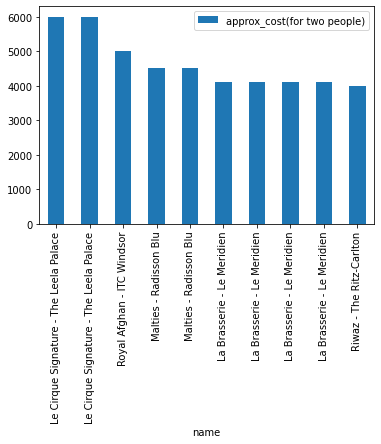

In [54]:
zomato_copy.nlargest(10,'approx_cost(for two people)').plot.bar(x='name',y='approx_cost(for two people)')

# 10 cheapest restaurants

<AxesSubplot:xlabel='name'>

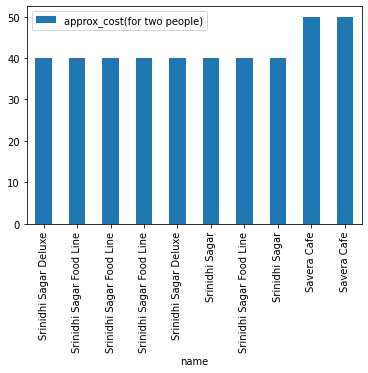

In [55]:
zomato_copy.nsmallest(10,'approx_cost(for two people)').plot.bar(x='name',y='approx_cost(for two people)')

# Budget hotels(below Rs500)

In [56]:
budget_res=zomato.loc[zomato['approx_cost(for two people)']<500,['name','approx_cost(for two people)']]
budget_res

,name,approx_cost(for two people)
3,Addhuri Udupi Bhojana,300
13,Caf-Eleven,450
18,T3H Cafe,300
19,360 Atoms Restaurant And Cafe,400
20,The Vintage Cafe,400
...,...,...
51634,Venice Kerala Restaurant,200
51635,Thai & Chinese Fast Food,400
51637,The Crunch,300
51640,Punjabi Charchay,400


# Budget restaurants with rating>4

In [57]:
criteria=(zomato['approx_cost(for two people)']<500) & (zomato['rate']>4)

In [58]:
len(zomato.loc[criteria,['name','rate','approx_cost(for two people)']]['name'].unique())

313

# Various affordable restaurants at different locations of Bangalore

In [59]:
afford=zomato.loc[zomato['approx_cost(for two people)']<500,:]
afford.shape

(21925, 17)

In [60]:
restaurant=[]
location=[]
for loc,res in afford.groupby('location'):
    location.append(loc)
    restaurant.append(len(res['name'].unique()))

In [61]:
afford_res=pd.DataFrame(zip(location,restaurant))
afford_res

,0,1
0,BTM,415
1,Banashankari,161
2,Banaswadi,99
3,Bannerghatta Road,224
4,Basavanagudi,151
...,...,...
84,West Bangalore,2
85,Whitefield,329
86,Wilson Garden,31
87,Yelahanka,2


# Find best budget restaurants at any location

In [62]:
def budget_loc(restaurant,location):
    df=(zomato[(zomato['approx_cost(for two people)']<500) 
               & (zomato['location']==location) 
               & (zomato['rate']>4) 
               & (zomato['rest_type']==restaurant)])
    return df['name'].unique()

In [63]:
budget_loc('Quick Bites','BTM')

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)